In [1]:
import os
import scanpy as sc
import pandas as pd
import numpy as np
from tqdm import tqdm
os.chdir('/home/jovyan/fetal_lung_immune_Peng')
sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.4.6 numpy==1.19.4 scipy==1.5.3 pandas==1.4.4 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [2]:
import dandelion as ddl
ddl.logging.print_header()

dandelion==0.3.1.dev21 pandas==1.4.4 numpy==1.19.4 matplotlib==3.5.2 networkx==2.8.8 scipy==1.5.3


In [3]:
# read in annotated h5ad file
adata_source = sc.read_h5ad('/lustre/scratch126/cellgen/team205/ph12/200929FetalImmune/220120Annotated_Fetal_lung_immune_filtered_soupxcite.h5ad')

In [4]:
adata_source.obs_names = [name.split('-')[1] + '-' + name.split('-')[0] for name in adata_source.obs_names]

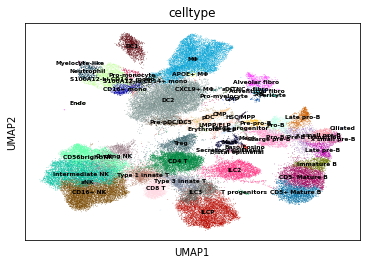

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8,8]
sc.pl.umap(adata_source, color=['celltype'],legend_loc='on data',legend_fontsize=6)

In [6]:
# vdj preprocessed with dandelion
vdj_loc = '/lustre/scratch126/cellgen/team205/sharedData/cs42/23-05-30-fetal-lung-redandelion/tcr'
vdj_loc_alt = '/lustre/scratch126/cellgen/team205/sharedData/cs42/23-06-04-dandelion-missing-TCR'

## tcr-ab

In [7]:
meta = pd.read_csv('manifest/manifest.csv')

In [8]:
meta

,Sample,GEX,GEX_update,TCR,BCR,gdTCR
0,C44-LNG-6-SC-2,5891STDY8062349,5891STDY8062349,5891STDY8062333,5891STDY8062341,NaN
1,C44-LNG-7-SC-2,5891STDY8062350,5891STDY8062350,5891STDY8062334,5891STDY8062342,NaN
2,C45-LNG-6-SC-2,5891STDY8062351,5891STDY8062351,5891STDY8062335,5891STDY8062343,NaN
3,C45-LNG-7-SC-2,5891STDY8062352,5891STDY8062352,5891STDY8062336,5891STDY8062344,NaN
4,C46-LNG-6-SC-2,5891STDY8062353,5891STDY8062353,5891STDY8062337,5891STDY8062345,NaN
5,C46-LNG-7-SC-2,5891STDY8062354,5891STDY8062354,5891STDY8062338,5891STDY8062346,NaN
6,C47-LNG-6-SC-2,5891STDY8062355,5891STDY8062355,5891STDY8062339,5891STDY8062347,NaN
7,C47-LNG-7-SC-2,5891STDY8062356,5891STDY8062356,5891STDY8062340,5891STDY8062348,NaN
8,15279-LNG-7-SC-1,5891STDY9030806,5891STDY9030806,5891STDY9030811,NaN,NaN
9,15280-LNG-7-SC-1,5891STDY9030807,5891STDY9030807,5891STDY9030812,NaN,NaN


In [9]:
meta_TCR = meta.loc[~(meta['TCR'].isna()),:]
# only leave 8 samples that have both abTCR and gdTCR - to calculate productive/nonproductive chain % for gdTCR
#meta_TCR = meta.loc[~(meta['gdTCR'].isna()),:]

In [10]:
# use GEX_update 
# some GEX has (GEX) at the end, clear away these
# changed from CV001_KM9294203 Imm_FLNG8966065 to Imm_FLNG8966065
meta_TCR

,Sample,GEX,GEX_update,TCR,BCR,gdTCR
0,C44-LNG-6-SC-2,5891STDY8062349,5891STDY8062349,5891STDY8062333,5891STDY8062341,NaN
1,C44-LNG-7-SC-2,5891STDY8062350,5891STDY8062350,5891STDY8062334,5891STDY8062342,NaN
2,C45-LNG-6-SC-2,5891STDY8062351,5891STDY8062351,5891STDY8062335,5891STDY8062343,NaN
3,C45-LNG-7-SC-2,5891STDY8062352,5891STDY8062352,5891STDY8062336,5891STDY8062344,NaN
4,C46-LNG-6-SC-2,5891STDY8062353,5891STDY8062353,5891STDY8062337,5891STDY8062345,NaN
5,C46-LNG-7-SC-2,5891STDY8062354,5891STDY8062354,5891STDY8062338,5891STDY8062346,NaN
6,C47-LNG-6-SC-2,5891STDY8062355,5891STDY8062355,5891STDY8062339,5891STDY8062347,NaN
7,C47-LNG-7-SC-2,5891STDY8062356,5891STDY8062356,5891STDY8062340,5891STDY8062348,NaN
8,15279-LNG-7-SC-1,5891STDY9030806,5891STDY9030806,5891STDY9030811,NaN,NaN
9,15280-LNG-7-SC-1,5891STDY9030807,5891STDY9030807,5891STDY9030812,NaN,NaN


### filter samples that have been sequenced, and load TCR data

In [11]:
adata_source.obs['sample'] = [name.split('-')[0] for name in adata_source.obs['batch']]

In [12]:
meta_TCR['GEX_update'].isin(adata_source.obs['sample']) # Imm_FLNG8965967 missing in adata_source, otherwise matched from GEX
meta_TCR = meta_TCR.loc[meta_TCR['GEX_update'].isin(adata_source.obs['sample']),:]

In [13]:
adata = adata_source[adata_source.obs['sample'].isin(meta_TCR['GEX_update'])].copy() # only leave samples that have been abTCR-sequenced

/home/jovyan/my-conda-envs/palantir/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [14]:
# update adata.obs_names to match format of sample-barcode
adata.obs['barcodes']= [name.split('-')[1] for name in adata.obs_names]
adata.obs_names = adata.obs['sample'].astype('str')+'-'+adata.obs['barcodes']

In [15]:
tcrab = {}
for x, y in tqdm(zip(meta_TCR['TCR'], meta_TCR['GEX_update'])):
    file = vdj_loc + '/'+x+'/dandelion/tmp/all_contig_igblast_db-all.tsv'
    if os.path.exists(file):
        tmp = pd.read_csv(file, sep ='\t')
        tmp['cell_id'] = [y + '-' + z.split('-')[0] for z in tmp['cell_id']]
        tmp = tmp[tmp['cell_id'].isin(adata.obs_names)].copy()
        if 'duplicate_count' not in tmp:
            tmp['duplicate_count'] = tmp['umi_count']
            tmp.drop('umi_count', axis = 1, inplace = True)
        tcrab[x] = ddl.Dandelion(tmp)
    else: 
        print(x)
        file1 = vdj_loc_alt + '/'+x+'/dandelion/tmp/all_contig_igblast_db-all.tsv'
        tmp = pd.read_csv(file1, sep ='\t')
        tmp['cell_id'] = [y + '-' + z.split('-')[0] for z in tmp['cell_id']]
        tmp = tmp[tmp['cell_id'].isin(adata.obs_names)].copy()
        if 'duplicate_count' not in tmp:
            tmp['duplicate_count'] = tmp['umi_count']
            tmp.drop('umi_count', axis = 1, inplace = True)
        tcrab[x] = ddl.Dandelion(tmp)
        
len(tcrab)

34it [00:27,  1.45s/it]

Imm_FLNG8966070


35it [00:27,  1.25it/s]


35

In [16]:
# concatenate
tcrab = ddl.concat([tcrab[x] for x in tcrab], prefixes = list(tcrab.keys()))
tcrab

Dandelion class object with n_obs = 25232 and n_contigs = 51551
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'duplicate_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_b

In [17]:
# library_type is set to filter out genes that are not TRA/TRB (in 'locus' column) as this library is abTCR
tcrab_checked, trab_adata = ddl.pp.check_contigs(tcrab, adata, productive_only = False, library_type = 'tr-ab')
tcrab_checked

Preparing data: 51361it [00:17, 2908.58it/s]
Scanning for poor quality/ambiguous contigs: 100%|██████████| 25215/25215 [02:12<00:00, 190.74it/s]


Dandelion class object with n_obs = 25142 and n_contigs = 51361
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'duplicate_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_b

In [18]:
tcrab_checked.write_h5ddl('write/abTCR_04062023_fetal_lung.h5ddl', compression = 'blosc:lz4')

In [19]:
trab_adata.write_h5ad('write/abTCR_04062023_fetal_lung.h5ad', compression = 'gzip')

## tcr-gd

In [20]:
meta_TCRgd = meta_TCR.loc[~(meta_TCR['gdTCR'].isna()),:]

In [21]:
tcrgd = {}
for x, y in tqdm(zip(meta_TCRgd['gdTCR'], meta_TCRgd['GEX_update'])):
    file = vdj_loc + '/'+x+'/dandelion/tmp/hiconf_contig_igblast_db-all.tsv'
    try:
        tmp = pd.read_csv(file, sep ='\t')
        tmp['cell_id'] = [y + '-' + z.split('-')[0] for z in tmp['cell_id']]
        tmp = tmp[tmp['cell_id'].isin(adata.obs_names)].copy()
        if 'duplicate_count' not in tmp:
            tmp['duplicate_count'] = tmp['umi_count']
            tmp.drop('umi_count', axis = 1, inplace = True)
        tcrgd[x] = ddl.Dandelion(tmp)
    except:
        # print(x)
        pass
len(tcrgd)

8it [00:03,  2.39it/s]


8

In [22]:
# concatenate
tcrgd = ddl.concat([tcrgd[x] for x in tcrgd], prefixes = list(tcrgd.keys()))
tcrgd

Dandelion class object with n_obs = 4022 and n_contigs = 5431
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'duplicate_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_bla

In [23]:
tcrgd_checked, trgd_adata = ddl.pp.check_contigs(tcrgd, adata, productive_only = False, library_type = 'tr-gd')
tcrgd_checked

Preparing data: 5331it [00:01, 3155.39it/s]
Scanning for poor quality/ambiguous contigs: 100%|██████████| 3977/3977 [00:15<00:00, 264.98it/s]


Dandelion class object with n_obs = 3973 and n_contigs = 5331
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'duplicate_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_bla

In [24]:
tcrgd_checked.write_h5ddl('write/gdTCR_04062023_fetal_lung.h5ddl', compression = 'blosc:lz4')

/home/jovyan/dandelion/dandelion/utilities/_core.py:1396: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block2_values] [items->Index(['sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call',
       'j_call', 'sequence_alignment', 'germline_alignment', 'junction',
       'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon',
       'vj_in_frame', 'locus', 'c_call', 'fwr1', 'fwr2', 'fwr3', 'fwr4',
       'cdr1', 'cdr2', 'cdr3', 'cell_id', 'v_call_10x', 'j_call_10x',
       'junction_10x', 'junction_10x_aa', 'j_call_igblastn', 'j_call_blastn',
       'j_sequence_alignment_blastn', 'j_germline_alignment_blastn',
       'j_source', 'd_call_igblastn', 'd_call_blastn',
       'd_sequence_alignment_blastn', 'd_germline_alignment_blastn',
       'd_source', 'fwr1_aa', 'fwr2_aa', 'fwr3_aa', 'fwr4_aa', 'cdr1_aa',
       'cdr2_aa', 'cdr3_aa', 'sequence_alignment_

In [25]:
trgd_adata.write_h5ad('write/gdTCR_04062023_fetal_lung.h5ad', compression = 'gzip')

### make a singular object

In [26]:
tcrgd_checked.data['v_call_genotyped'] = tcrgd_checked.data.v_call
tcrab_checked.data['v_call_genotyped'] = tcrab_checked.data.v_call
vdj = ddl.concat([tcrab_checked,tcrgd_checked])
vdj # problem that v_call_VDJ_main disappeared

Dandelion class object with n_obs = 26532 and n_contigs = 56692
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'duplicate_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_b

In [27]:
ddl.tl.transfer(adata, vdj)

In [28]:
adata.write_h5ad('write/220120Annotated_Fetal_lung_immune_filtered_soupxcite_ddl.h5ad', compression = 'gzip')
#adata.write_h5ad('write/PAN.A01.v01.entire_data_normalised_log.20210429.LYMPHOID.embedding_dandelion_150822.h5ad', compression = 'gzip')

In [29]:
adata

AnnData object with n_obs × n_vars = 76494 × 27292
    obs: 'batch', 'status', 'assignment', 'donor', 'stage', 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'leiden', 'phase', 'S_score', 'G2M_score', 'project', 'domain', 'gender', 'leiden_R', 'celltype', 'status_summary', 'productive_summary', 'isotype_summary', 'receptor_type', 'receptor_subtype', 'temp', 'sample', 'barcodes', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_genotyped_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_genotyped_abT_VDJ', 'd_call_abT_VDJ', 'j_call_abT_VDJ', 'v_call_genotyped_abT_VJ', 'j_call_abT_VJ', 'c_call_abT_VDJ', 'c_call_abT_VJ', 'productive_abT_VDJ', 'productive_abT_VJ', 'v_call_genotyped_gdT_VDJ', 'd_call_gdT_VDJ', 'j_call_gdT_VDJ', 'v_call_genotyped_gdT_VJ', 'j_call_gdT_VJ', 'c_call_gdT_VDJ', 'c_call_gdT_VJ', 'productive_gdT_VDJ', 'pr